# Geopandas 연습 1

In [1]:
import geopandas as gpd #geopandas 패키지 불러오기

In [2]:
a = gpd.read_file('C:\\Users\\user\\Desktop\\자료조사\\전주 등고선\\JeonjuDeungo.shp') #공간데이터 불러오기
a.head()

,UFID,DIVI,CONT,SCLS,FMTA,geometry
0,TPG010000000PGFJ2,CTD001,250.0,None,None,"LINESTRING (217704.722 253000.467, 217705.718 ..."
1,TPG010000000PGHF0,CTD001,200.0,None,None,"LINESTRING (213214.832 251717.962, 213212.957 ..."
2,TPG010000000PGI5R,CTD001,225.0,None,None,"LINESTRING (213467.029 252112.105, 213466.844 ..."
3,TPG010000000PGR3Y,CTD001,175.0,None,None,"MULTILINESTRING ((213231.859 251884.800, 21323..."
4,TPG010000000PGRPK,CTD001,300.0,None,None,"LINESTRING (207055.462 250308.508, 207055.788 ..."


In [3]:
type(a)

geopandas.geodataframe.GeoDataFrame

In [4]:
data = a[['UFID','DIVI','CONT','geometry']] #사용할 열만 추출 cf.행을 추출하고 싶다면 .loc[m:n] or .iloc[m:n] : m행부터 n행까지
data

,UFID,DIVI,CONT,geometry
0,TPG010000000PGFJ2,CTD001,250.0,"LINESTRING (217704.722 253000.467, 217705.718 ..."
1,TPG010000000PGHF0,CTD001,200.0,"LINESTRING (213214.832 251717.962, 213212.957 ..."
2,TPG010000000PGI5R,CTD001,225.0,"LINESTRING (213467.029 252112.105, 213466.844 ..."
3,TPG010000000PGR3Y,CTD001,175.0,"MULTILINESTRING ((213231.859 251884.800, 21323..."
4,TPG010000000PGRPK,CTD001,300.0,"LINESTRING (207055.462 250308.508, 207055.788 ..."
...,...,...,...,...
605,TPG010000000PNQEF,CTD001,50.0,"LINESTRING (214805.950 261734.700, 214805.828 ..."
606,TPG010000000PNRFH,CTD001,25.0,"LINESTRING (206631.662 263217.093, 206619.247 ..."
607,TPG010000000PNVNT,CTD001,50.0,"LINESTRING (214342.792 262228.241, 214342.408 ..."
608,TPG010000000PNWKR,CTD001,50.0,"LINESTRING (204404.850 262274.920, 204399.255 ..."


In [5]:
data.CONT.value_counts() #CONT을 기준으로 (유형별)데이터의 갯수 확인 

50.0     78
75.0     75
25.0     58
100.0    56
200.0    39
125.0    36
225.0    34
275.0    34
250.0    26
175.0    25
150.0    22
300.0    19
325.0    18
375.0    15
350.0    14
400.0    13
425.0    12
450.0    11
500.0     4
475.0     4
600.0     2
725.0     2
525.0     2
700.0     2
625.0     2
550.0     2
675.0     1
775.0     1
650.0     1
750.0     1
575.0     1
Name: CONT, dtype: int64

<AxesSubplot:>

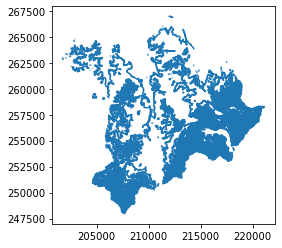

In [6]:
data.plot() #.shp 파일 그래프 그리기

# GeoPandas 연습 2

#### 참고페이지https://datascienceschool.net/03%20machine%20learning/03.04.01%20%EC%A7%80%EB%A6%AC%20%EC%A0%95%EB%B3%B4%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%B2%98%EB%A6%AC.html

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

#### geopandas에서 제공하는 데이터 사용

In [8]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'), encoding='cp949')
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'), encoding='cp949')

In [9]:
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [10]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


[]

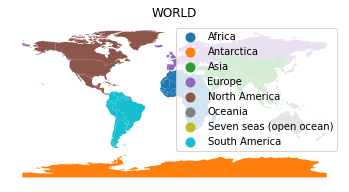

In [11]:
ax = countries.plot(column = 'continent', legend=True, categorical = True) 
    #column = 'continent': 대륙별 카테고리 분류
    #legend = True: 범례표시
    #categorical = True: 카데고리 데이터일 경우                             Q.질문: categorical=True 설정하는 필요성? 이유? 모르겠다.
ax.set_title('WORLD') #그래프 제목 설정                                    Q.한국어 제목을 달고 싶을 때 인코딩 형식 지정
ax.set_axis_off() #축이 보이지 않도록 설정
plt.plot()

[]

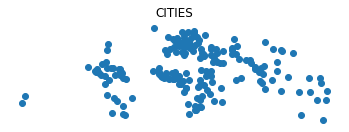

In [12]:
bx = cities.plot()
bx.set_axis_off()
bx.set_title('CITIES')
plt.plot()

#### 1인당 GDP 연산

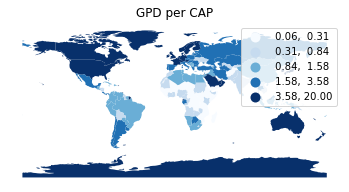

In [13]:
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme = 'quantiles', cmap='Blues', k=5)
ax.set_axis_off()
ax.set_title('GPD per CAP')
plt.show()

## Geometry 데이터


### polygon

In [14]:
countries.geom_type[:3]

0    MultiPolygon
1         Polygon
2         Polygon
dtype: object

In [15]:
print(countries.geometry[:])

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry


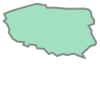

In [16]:
countries.geometry[113]

### points

In [17]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

In [18]:
print(cities.geometry[3])

POINT (6.130002806227083 49.61166037912108)


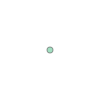

In [19]:
cities.geometry[3]

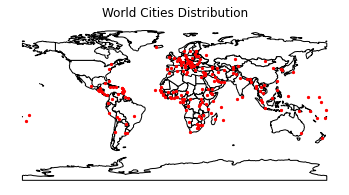

In [20]:
base = countries.plot(color = 'white', edgecolor = 'k') #edgecolor ='k': 검정색 실선으로 표현
ax = cities.plot(ax = base, marker = 'o', markersize = 5, color='red') #ax=bse를 통해 두 그래프를 포개어 나타냄
ax.set_title('World Cities Distribution')
ax.set_axis_off()
plt.show()

### LineString

In [21]:
korea_border = countries[countries.name == 'South Korea'].geometry

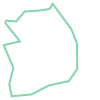

In [22]:
korea_border.boundary.squeeze() #squeeze함수는 geopandas객에서 geometry 데이터만을 추출해준다.

### GeoPandas 관계연산 예제

In [23]:
from shapely.geometry import point, polygon, LineString

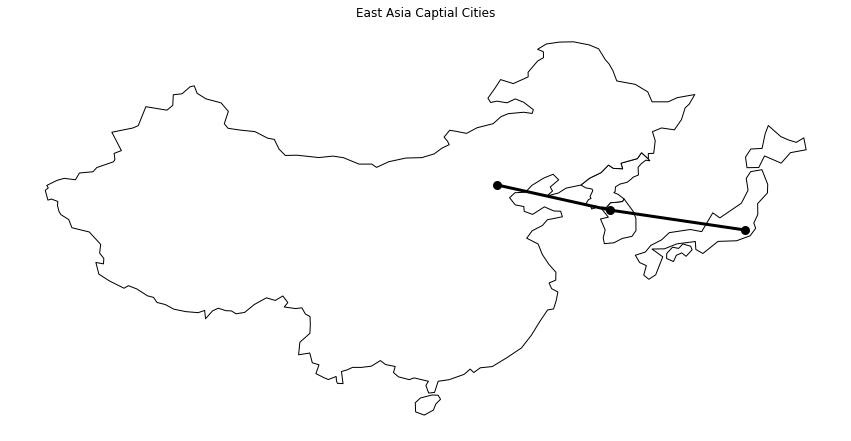

In [24]:
northern_asia = countries.loc[countries['name'].isin(['North Korea', 'South Korea','China','Japan'])]
base = northern_asia.plot(figsize = (15,15), color = 'w', edgecolor = 'k')

seoul = cities.loc[cities['name']=='Seoul','geometry'].squeeze()
tokyo = cities.loc[cities['name']=='Tokyo','geometry'].squeeze()
beijing = cities.loc[cities['name']=='Beijing','geometry'].squeeze()

line = LineString([beijing,seoul,tokyo])

ax = gpd.GeoSeries([seoul,beijing,tokyo,line]).plot(ax=base, color='k', edgecolor = 'k', lw=3)
ax.set_title('East Asia Captial Cities')
ax.set_axis_off()
plt.show()

### 기본관계연산
#### within, contains, intersect, crosses

In [25]:
south_korea = countries.loc[countries['name']=='South Korea', 'geometry'].squeeze()
china = countries.loc[countries['name']=='China', 'geometry'].squeeze()
japan = countries.loc[countries['name']=='Japan', 'geometry'].squeeze()

#### within: 지리적으로 포함되는가 여부

In [26]:
seoul.within(south_korea)

True

In [27]:
south_korea.within(seoul)

False

#### contains: 지리적으로 포함하는가 여부

In [28]:
south_korea.contains(seoul)

True

#### crosses: 지리적으로 교차하는가 여부

In [29]:
line.crosses(south_korea)

True

### 거리계산

In [30]:
seoul.distance(beijing)

10.871264032732043

In [31]:
seoul.distance(tokyo)

12.889711504118798

#### 면적

In [32]:
south_korea.area

9.954819746830225

In [33]:
china.area/japan.area

23.05597869225749